## EECS 491 Assignment 2

### Q1. Conditional Independence (10 pts)

Consider the following bayes net:

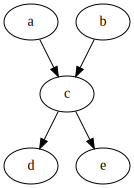

In [1]:
from graphviz import Digraph

q1 = Digraph()
q1.node('a') # variable name, label
q1.node('b')
q1.node('c')
q1.node('d')
q1.node('e')
q1.edges(['ac', 'bc', 'cd', 'ce'])
# render inline
q1

1.1. (5 pts) Show that $a$ is independent of $b$ given no other information, i.e.
$$
a \perp b\, |\, \varnothing
$$

If this is true, then
$$p(a,b) = p(a)p(b)$$
We ignore $d$ and $e$, since $a$ and $b$ have no direct connections to them. Marginalizing over $c$, we get
$$p(a,b) = \sum_{c}p(a,b,c)$$
$$p(a,b) = \sum_{c}p(c|a,b)p(a)p(b)$$
$$p(a,b) = p(a)p(b)\sum_{c}p(c|a,b)$$
$$p(a,b) = p(a)p(b)$$

1.2. (5 pts) Prove or disprove the following using basic probability (i.e. not using d-separation)
$$
a \perp b\, |\, e
$$

For this to be true, we want to show that
$$p(a,b|e) = p(a|e)p(b|e)$$
Ignoring $d$, we rewrite as shown
$$p(a,b|e) = \frac{1}{p(e)}\sum_{c}p(a,b,c,e)$$
$$p(a,b|e) = \frac{1}{p(e)}\sum_{c}p(c|a,b)p(e|c)p(a)p(b)$$
$$p(a,b|e) = \frac{p(a)p(b)}{p(e)}\sum_{c}p(c|a,b)p(e|c)$$
$$p(a,b|e) = p(a)p(b)\sum_{c}p(c|a,b)$$
There is no way to rewrite this expression such that
$$p(a,b|e) = p(a|e)p(b|e)$$

### Q2. Conditional Independence and Causality (5 pts)

Consider the following model

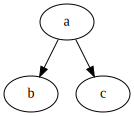

In [2]:
q2 = Digraph()
q2.node('a') # variable name, label
q2.node('b')
q2.node('c')
q2.edges(['ac', 'ab'])
# render inline
q2

Show that this causal relationship suggested by the arrows does not necessarily hold, because the identical distribution can be represented by a model defined by different conditional distributions.  What conditional independence assumption does this model make?

The joint probability of this model is
$$p(a,b,c) = p(b|a)p(c|a)p(a).$$
Using Bayes' rule, we can rewrite $p(b|a)$ as
$$p(b|a) = \frac{p(a|b)p(b)}{p(a)},$$
so
$$p(a,b,c) = p(b|a)p(c|a)p(a)$$

$$p(a,b,c) = \frac{p(a|b)p(b)}{p(a)}p(c|a)p(a)$$

$$p(a,b,c) = p(a|b)p(c|a)p(b),$$
which can be represented as the following model:

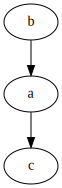

In [3]:
q2a = Digraph()
q2a.node('a') # variable name, label
q2a.node('b')
q2a.node('c')
q2a.edges(['ac', 'ba'])
# render inline
q2a

However, we can see that
$$b \perp c | a$$
because
$$p(b,c|a) = \frac{p(a,b,c)}{p(a)}$$

$$p(b,c|a) = \frac{p(b|a)p(c|a)p(a)}{p(a)}$$

$$p(b,c|a) = p(b|a)p(c|a)$$

### Q3. Model Complexity, Free Parameters, and Simplifying Assumptions (20 pts)

3.1. (5 pts) Consider a *general* joint probability distribution with $N$ variables $x_1 \ldots x_N$ each of which can have $K$ values. What is the expression for the joint distribution in terms of conditional probabilities?

$$p(x_1,x_2,x_3,...,x_{N-1},x_N) = p(x_1|x_2,x_3,...,x_{N-1},x_N)p(x_2|x_3,...,x_{N-1},x_N)p(x_3|...,x_{N-1},x_N)...p(x_{N-1}|x_N)p(x_N)$$

3.2. (5 pts) What is the total number of free-paramters requried to specify this model?  (Note: the term "free parameter" means a parameter that is unconstrained.  For example a Beroulli distribution to describe a coin flip has one free parameter $\theta$ to describe, say, the probability of heads; the probability of tails must be $1-\theta$, because the probability is constrained to sum to one.) Provide both the exact expression and a simpler one in "big-O" notation.

For the first term, one needs to specify $(K-1)K^{N-1}$ values. Continuing this into a series, there are
$$K^N-1$$
free parameters, or
$$O(K^N)$$

3.3. (5 pts) Now suppose that the complexity of the model is constrained, so that each variable depends on (at most) $m$ other variables and is conditionally independent of the rest, i.e. a Bayes net.  Each node has $m$ parents and there are $m$ root nodes.  How many parameters are required to define this model?

$$NK^m(K-1)$$

3.4. (5 pts) Let us make one more simplifying assumption, which is that in addition to depending on only $m$ variables, the conditional probability is described by a noisy-OR function (K=2, see Q3).  What is the expression for the number of parameters in this case?

$$mN$$

### Q4. Models of Conditional Probability (20 pts)

In Bayesian networks (or directed acyclic graphical models), the joint probability distribution is factored into the product of conditional probability distributions

$$
p(x) = \prod_{i=1}^N p(x_i|\textrm{pa}(x_i))
$$

As we used the previous problem, a simplifying assumption for the conditional probability is noisy-OR model

$$
p(x_i | \textrm{pa}({x_i})) = 1 - (1 - \mu_{i0}) \prod_{\normalsize j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j}
$$

where $j$ is an index over the parents of $x_i$.  Note that the exponent $x_j$ is either 0 or 1 so the term is either 1 or $1-\mu_{ij}$ depending on the state of the parent $x_j$.

4.1 (5 pts) Show that the noisy-OR function can be interpreted as a "soft" (i.e. probabilistic) form of the logical OR function, i.e. the function gives $x_i = 1$ whenever at least one of the parents is 1.

Consider the following model using noisy-OR:

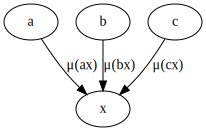

In [4]:
q4 = Digraph()
q4.node('a')
q4.node('b')
q4.node('c')
q4.node('x')
q4.edge('a','x',label=' \u03BC(ax)')
q4.edge('b','x',label=' \u03BC(bx)')
q4.edge('c','x',label=' \u03BC(cx)')

q4

In this model, the probability of $x=1$ is given as
$$p(x=1|a,b,c,...) = 1 - (1 - \mu_{ax})(1 - \mu_{bx})(1 - \mu_{cx})...$$
If all $\mu_{ix}$ are zero, then
$$(1 - \mu_{ix}) = 1$$
$$p(x=1|a,b,c,...) = 1 - (1)(1)(1)... = 0.$$
However, if any $\mu_{ix}$ is one, then
$$(1 - \mu_{ix}) = 0$$
$$p(x=1|a,b,c,...) = 1 - (0)(1)(1)... = 1.$$

4.2 (5 pts) What is the interpretation of $\mu_{i0}$? Provide a clear explanation.

$\mu_{i0}$ is the prior probability of $x_i$ given no information, i.e.
$$p(x_i|\varnothing)$$

Another choice for the conditional probability is a sigmoid function

$$
p(x_i | \textrm{pa}({x_i})) = \sigma
\left(
w_{i0} + \sum_{\normalsize j \in \textrm{pa}(x_i)} w_{ij} x_j
\right)\,, \quad \textrm{where} \;
\sigma(a) = \frac{1}{1+e^{-a}}
$$

where $\sigma (a)$ is the logistic sigmoid function.

4.3 (5 pts) Contrast the noisy-OR function and the sigmoid mathematically.  Is one more general than the other?  Can each compute unique functions?

4.4 (5 pts) Think of two examples, one for the noisy-OR and one for the sigmoid, that contrast the way these functions model the conditional dependencies.  Explain how each is appropriately modeled by one function but not the other.

### Q5. Car Troubles (25 pts)

(Adpted from Barber Exercise 3.6) Your friend has car trouble.  The probability of the car starting is described by the model below, with the probabilities givien in Barber 3.6.

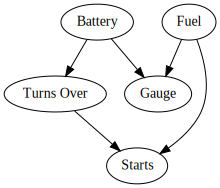

In [5]:
q5 = Digraph()
q5.node('b', 'Battery')
q5.node('g', 'Gauge')
q5.node('f', 'Fuel')
q5.node('t', 'Turns Over')
q5.node('s', 'Starts')
q5.edges(['bg','fg','bt','ts','fs'])
q5

5.1 (10 pts) Calculate the $p(f=\textsf{empty} | s=\textsf{no})$, the probability of the fuel tank being empty given that the car does not start.  Do this "by hand", i.e in manner similar to the **Inference** section in Barber 3.1.1.  Use the probabilities given in the exercise.  Show your work.

Probabilities from the exercise:

| Expression &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Value | Expression &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Value |
| :-------------- | :--- | :-------------- | :--- |
| $p(b=0)$ | 0.02 | $p(f=0)$ | 0.05 |
| $p(g=0|b=1,f=1)$ | 0.04 | $p(g=0|b=1,f=0)$ | 0.97 |
| $p(g=0|b=0,f=1)$ | 0.1 | $p(g=0|b=0,f=0$ | 0.99 |
| $p(t=0|b=1)$ | 0.03 | $p(t=0|b=0)$ | 0.98 |
| $p(s=0|t=1,f=1)$ | 0.01 | $p(s=0|t=1,f=0$ | 0.92 |
| $p(s=0|t=0,f=1)$ | 1 | $p(s=0|t=0,f=0$ | 0.99 |

$$p(f=0|s=0) = \frac{p(f=0,s=0)}{p(s=0)}$$

$$p(f=0|s=0) = \frac{\sum_{b,g,t}p(b,f=0,g,t,s=0)}{\sum_{b,f,g,t}p(b,f,g,t,s=0)}$$

$$p(f=0|s=0) = \frac{\sum_{b,g,t}p(g|b,f=0)p(t|b)p(s=0|f=0,t)p(b)p(f=0)}{\sum_{b,f,g,t}p(g|b,f)p(t|b)p(s=0|f,t)p(b)p(f)}$$

$$p(f=0|s=0) = \frac{0.99x0.98x0.99x0.02x0.05 + 0.99x0.02x0.92x0.02x0.05 + 0.01x0.98x0.99x0.02x0.05 + 0.01x0.02x0.92x0.02x0.05 + 0.97x0.03x0.99x0.98x0.05 + 0.97x0.97x0.92x0.98x0.05 + 0.03x0.03x0.99x0.98x0.05 + 0.03x0.97x0.92x0.98x0.05}{0.99x0.98x0.99x0.02x0.05 + 0.99x0.02x0.92x0.02x0.05 + 0.01x0.98x0.99x0.02x0.05 + 0.01x0.02x0.92x0.02x0.05 + 0.97x0.03x0.99x0.98x0.05 + 0.97x0.97x0.92x0.98x0.05 + 0.03x0.03x0.99x0.98x0.05 + 0.03x0.97x0.92x0.98x0.05 + 0.1x0.98x1x0.02x0.95 + 0.1x0.02x0.01x0.02x0.95 + 0.9x0.98x1x0.02x0.95 + 0.9x0.02x0.01x0.02x0.95 + 0.04x0.03x1x0.98x0.95 + 0.04x0.97x0.01x0.98x0.95 + 0.96x0.03x1x0.98x0.95 + 0.96x0.97x0.01x0.98x0.95}$$

$$p(f=0|s=0) = \frac{0.0462}{0.1018}$$

$$p(f=0|s=0) = 0.4537$$

5.2 (5 pts) Implement this network using a toolbox for probabilistic models (e.g. `pgmpy` or `BayesNets.jl`). Use this to verify that your derivation and calculations are correct for the previous problem.

In [12]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [11]:
# Create model from list of edges
model = BayesianModel([('B','G'),('F','G'),('B','T'),('T','S'),('F','S')])

# define p(B) and p(M) 
# variable_card is cardinality = 2 for true|false
# values are defined in numeric order p(x_i = [false, true]), ie  [0, 1]
priorB = TabularCPD(variable='B', variable_card=2, values=[[0.02, 0.98]])
priorF = TabularCPD(variable='F', variable_card=2, values=[[0.05, 0.95]])

# define p(G|B,F)
# Variables cycle in numerical order of evidence values,
# ie BF = 00, 01, 10, 11 for each value of G.
cpdG = TabularCPD(variable='G', variable_card=2, 
                  evidence=['B', 'F'], evidence_card=[2, 2],
                  values=[[0.99, 0.1, 0.97, 0.04], 
                          [0.01, 0.9, 0.03, 0.96]])

# define p(T|B)
cpdT = TabularCPD(variable='T', variable_card=2,
                 evidence=['B'], evidence_card=[2],
                 values=[[0.98, 0.03],
                         [0.02, 0.97]])

# define p(S|T,F)
cpdS = TabularCPD(variable='S', variable_card=2, 
                  evidence=['T', 'F'], evidence_card=[2, 2],
                  values=[[0.99, 1.0, 0.92, 0.01], 
                          [0.01, 0.0, 0.08, 0.99]])

# add probabilities to model
model.add_cpds(priorB, priorF, cpdG, cpdT, cpdS)
model.check_model()

True

In [13]:
inference = VariableElimination(model)
print(inference.query(['F'], evidence={'S' : 0}))

Eliminating: B: 100%|██████████| 3/3 [00:00<00:00, 760.16it/s]

+------+----------+
| F    |   phi(F) |
+======+==========+
| F(0) |   0.4537 |
+------+----------+
| F(1) |   0.5463 |
+------+----------+


5.3 (10 pts) Suppose you have loaned this car to a friend. They call call you and announce, "the car won't start".  Illustrate your diagnostic and inference process by using the model to show how your beliefs change as you ask questions.  Your friend can only tell you the states of $t$ and $g$ (and you already know $s$).  Use two different scenarios, i.e. two differnt reasons why the car won't start.  For each scenario, your answer should discuss your choice of each question you pose to the network, and how it allows you to uncover the true cause the problem.

### Exploration (20 pts)


Implement a belief network of your own choosing or design.  It should be more complex that the examples above.  It should be discrete (we will cover continous models later). Use the model to illustrate deductive inference problems.